# **Traffic Safety in Washington, D.C.**

Contributors: Darian Madere and Nimu Sidhu

## **Imports and Styles**

In [0]:
from CallAPIs import *
from Clean_Orig_Data import *
from Create_Aggregate_Datasets import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="whitegrid")

Response Status Code = 200
Response Status Code = 200
Response Status Code = 200
Response Status Code = 200


/content/Clean_Orig_Data.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_df.TRAFFIC_CAM[index] = 0
/content/Clean_Orig_Data.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_df.TRAFFIC_CAM[index] = 1
/content/Create_Aggregate_Datasets.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  streets_df.TRAFFIC_CAM[index] += 1
/content/Create_Aggregate_Datasets.py:48: SettingWithCopyWarning: 
A value is trying to be set 

# **Hypothesis #1**

***Is the probability of getting into an accident different between the wards?***

**Ho**: the probability of getting into an accident in each ward (1-8) is equal

**Ha**: the probability of getting into an accident in each of the wards (1-8) is different 

In [0]:
ward_accidents

,incidents
WARD,
Ward 1,88
Ward 2,218
Ward 3,62
Ward 4,71
Ward 5,161
Ward 6,145
Ward 7,144
Ward 8,106



##### **Calculate the Chi-Square Statistic**

Find Chi-square and Chi-critical value for alpha = 0.05.

In [0]:
chi_o = stats.chisquare(f_obs = ward_accidents.incidents, ddof =1)

chi_c = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_o[0]}, Chi Critical for Alpha = 0.05: {chi_c}")

Chi Observed: 155.31959798994976, Chi Critical for Alpha = 0.05: 14.067140449340167


The Chi Observed value (155.31959798994976) is greater than Chi Critical (4.067140449340167), we reject Ho.

*** insert reccomendations***

# **Hypothesis Test #2**

***Are citizens more likely to report safety concerns for any ward?***

**Ho**: P(Safety concern report | Ward) is the same across wards.

**Ha**: P(Safety concern report | Ward) is significantly different across wards.


In [0]:
safety_by_ward_df

,WARD,SAFETY_CONCERNS
1,1,25.0
2,2,87.0
3,3,9.0
4,4,15.0
5,5,31.0
6,6,96.0
7,7,6.0
8,8,3.0


##### **Calculate the Chi-Square Statistic**

Find Chi-square and Chi-critical value for alpha = 0.05.

In [0]:
chi_obs = stats.chisquare(f_obs = safety_by_ward_df.SAFETY_CONCERNS,
                ddof =1)

chi_crit = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_obs[0]}, Chi Critical for Alpha = 0.05: {chi_crit}")
  

Chi Observed: 278.6470588235294, Chi Critical for Alpha = 0.05: 14.067140449340167


Therefore, since Chi Observed >> Chi Critical, reject Ho. Evidence supports Ha.

Based on this statistical clarity, we can recommend that DC invest more of its traffic safety resources in wards receiving the greatest numbers of safety concern reports.

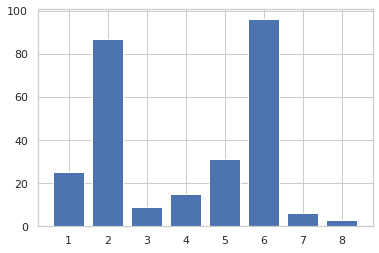

In [0]:
plt.bar(x = safety_by_ward_df.WARD, height= safety_by_ward_df.SAFETY_CONCERNS)
plt.show()

# **Hypothesis Test #3**

***Is the probability of getting injured in an accident different between the wards?***

**Ho**: the probability of getting injured from an accident in any given ward is the same

**Ha**: the probability of getting injured in an accident is significantly higher in one or more wards 

In [0]:
ward_injuries

,total_injuries
Ward 1,58
Ward 2,166
Ward 3,46
Ward 4,49
Ward 5,126
Ward 6,113
Ward 7,127
Ward 8,98


##### **Calculate the Chi-Square Statistic**

Find Chi-square and Chi-critical value for alpha = 0.05.

In [0]:
chi_o2 = stats.chisquare(f_obs = ward_injuries.total_injuries, ddof =1)

chi_c2 = stats.chi2.isf(q=0.05, df=7)

print(f"Chi Observed: {chi_o2[0]}, Chi Critical for Alpha = 0.05: {chi_c2}")

Chi Observed: 134.6500638569604, Chi Critical for Alpha = 0.05: 14.067140449340167


# **Hypothesis Test #4**

***Are street segments containing bike routes more or less likely to have accidents involving cyclists?***

**Ho**: P(Crash involving bicycle | Bike route) = P(Crash involving bicycle | No bike route)

**Ha**: P(Crash involving bicycle | Bike route) < P(Crash involving bicycle | No bike route)

In [0]:
streets_df.BIKE_R.value_counts()

0.0    1365
1.0    1000
Name: BIKE_R, dtype: int64

In [0]:
bike_route_info_df

,SAFETY_CONCERNS,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS
Non Bike Route,845.0,1662.0,7.0,49.0
Bike Route,155.0,139.0,1.0,5.0


##### **Calculate the Chi-Square Statistic**

Find Chi-square and Chi-critical value for alpha = 0.05.

In [0]:
prob_bike_r = streets_df.BIKE_R.value_counts()[1]/(streets_df.BIKE_R.value_counts()[1] 
                                                   + streets_df.BIKE_R.value_counts()[0])
prob_non_bike_r = streets_df.BIKE_R.value_counts()[0]/(streets_df.BIKE_R.value_counts()[1] 
                                                       + streets_df.BIKE_R.value_counts()[0])

chi_obs = stats.chisquare(f_obs = bike_route_info_df, 
                          f_exp= [[prob_non_bike_r, prob_non_bike_r, prob_non_bike_r, prob_non_bike_r], 
                                  [prob_bike_r, prob_bike_r, prob_bike_r, prob_bike_r]],
                          ddof =1)

chi_crit = stats.chi2.isf(q=0.05, df=1)

print(f"Chi Observed: {chi_obs[0]}, \np values: {chi_obs[1]}, \nChi Critical for Alpha = 0.05: {chi_crit}")

Chi Observed: [1.29194036e+06 4.82795914e+06 7.22624359e+01 4.11209936e+03], 
p values: [nan nan nan nan], 
Chi Critical for Alpha = 0.05: 3.8414588206941285


# **Hypothesis Test #5**

***Are street segments containing traffic cameras more or less likely to have accidents involving speeding or speeding concern reports?***

**Ho**: P(Speeding | Traffic camera) = P(Crash involving bicycle | No traffic camera)

**Ha**: P(Speeding | Traffic camera) < P(Crash involving bicycle | No traffic camera)

In [0]:
trafcam_info_df

,SAFETY_CONCERNS,Speeding,SPEEDING_INVOLVED,TOTAL_VEHICLES,TOTAL_BICYCLES,TOTAL_PEDESTRIANS
No Traffic Camera,973.0,21,13.0,1745.0,8.0,52.0
Traffic Camera,27.0,0,0.0,56.0,0.0,2.0


In [0]:
prob_trafcam = streets_df.TRAFFIC_CAM.value_counts()[1]/(streets_df.TRAFFIC_CAM.value_counts()[1] 
                                                   + streets_df.TRAFFIC_CAM.value_counts()[0])
prob_no_trafcam = streets_df.TRAFFIC_CAM.value_counts()[0]/(streets_df.TRAFFIC_CAM.value_counts()[1] 
                                                       + streets_df.TRAFFIC_CAM.value_counts()[0])

chi_obs = stats.chisquare(f_obs = trafcam_info_df, 
                          f_exp= [[prob_no_trafcam, prob_no_trafcam, prob_no_trafcam, 
                                   prob_no_trafcam, prob_no_trafcam, prob_no_trafcam], 
                                  [prob_trafcam, prob_trafcam, prob_trafcam, 
                                   prob_trafcam, prob_trafcam, prob_trafcam]],
                          ddof =1)

chi_crit = stats.chi2.isf(q=0.05, df=3)

print(f"Chi Observed: {chi_obs[0]}, \np values: {chi_obs[1]}, \nChi Critical for Alpha = 0.05: {chi_crit}")

Chi Observed: [9.98025099e+05 4.11872340e+02 1.48549718e+02 3.24302358e+06
 5.07229700e+01 2.82237613e+03], 
p values: [nan nan nan nan nan nan], 
Chi Critical for Alpha = 0.05: 7.814727903251178


# **Hypothesis Test #6**

***Based on information per ward, are safety concern reports, mostly reported by pedestrians, correlated with either number of vehicles or number of pedestrians involved in accidents?***

**Ho**: P(Safety concern | Pedestrian involved) = P(Safety concern | Vehicles involved)

**Ha**: P(Safety concern | Pedestrian involved) != P(Safety concern | Vehicles involved)

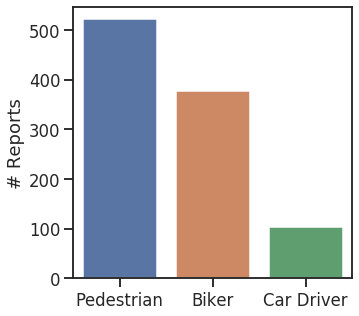

In [0]:
sns.set_context('talk')
sns.set_style('white')
sns.set_style('ticks')
safety_users = pd.DataFrame(safety_df.USERTYPE.value_counts())
plt.figure(figsize=[5,5])
sns.barplot(x = safety_users.index, y = safety_users.USERTYPE)
plt.xlabel("")
plt.ylabel("# Reports")
plt.savefig('user_safety.png')
plt.show()

In [0]:
safety_accid_by_ward_df

,WARD,SAFETY_CONCERNS,TOTAL_VEHICLES,TOTAL_PEDESTRIANS,TOTAL_BICYCLES
1,1,25.0,144.0,2.0,1.0
2,2,87.0,301.0,19.0,2.0
3,3,9.0,83.0,1.0,0.0
4,4,15.0,452.0,12.0,1.0
5,5,31.0,240.0,6.0,0.0
6,6,96.0,200.0,6.0,2.0
7,7,6.0,220.0,6.0,2.0
8,8,3.0,151.0,2.0,0.0


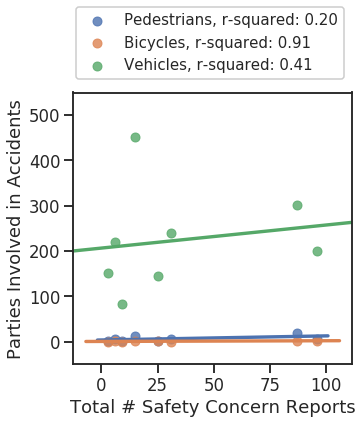

In [0]:
sns.set_context('talk')
sns.set_style('white')
sns.set_style('ticks')
plt.figure(figsize=[5,5])
sns.regplot(safety_accid_by_ward_df.SAFETY_CONCERNS,safety_accid_by_ward_df.TOTAL_PEDESTRIANS, label = "Pedestrians, r-squared: 0.20", ci = None)
sns.regplot(safety_accid_by_ward_df.SAFETY_CONCERNS,safety_accid_by_ward_df.TOTAL_BICYCLES, label = "Bicycles, r-squared: 0.91", ci = None)
sns.regplot(safety_accid_by_ward_df.SAFETY_CONCERNS, safety_accid_by_ward_df.TOTAL_VEHICLES, label = "Vehicles, r-squared: 0.41", ci = None)
plt.ylim(-50, 550)
plt.xlabel("Total # Safety Concern Reports")
plt.ylabel("Parties Involved in Accidents")
plt.legend(loc = [0.01,1.05], frameon = True, fontsize = 'small', framealpha = 1)
plt.savefig('accident_involvement_safety.png')
plt.show()

In [0]:
from scipy import stats
px = safety_accid_by_ward_df.SAFETY_CONCERNS
py = safety_accid_by_ward_df.TOTAL_PEDESTRIANS
slope, intercept, r_value, p_value, std_err = stats.linregress(px,py)
print(f"r-squared, pedestrians: {r_value**2}")
display(slope, intercept, r_value, p_value, std_err)

# These models are displaying slightly different results
import statsmodels.api as sm
mod = sm.OLS(py, px)
res = mod.fit()
display(res.summary())
res.conf_int(0.05) # for a 95% confidence interval of SLOPE statistic
# Given the poor fit of data, the confidence interval is very wide!

r-squared, pedestrians: 0.3031700453566327


0.09077475195271269

3.6636584336077687

0.5506087952045742

0.1572907766417611

0.056183618572142734

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      TOTAL_PEDESTRIANS   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                              11.63
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                      0.0113
Time:                        14:40:09   Log-Likelihood:                         -24.851
No. Observations:                   8   AIC:                                      51.70
Df Residuals:                       7   BIC:                                      51.78
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
SAFETY_CONCERNS     0.1440      0.042      3.410      0.011       0.044       0.244
==============================================================================
Omnibus:                        0.487   Durbin-Watson:                   2.357
Prob(Omnibus):                  0.784   Jarque-Bera (JB):                0.187
Skew:                          -0.300   Prob(JB):                        0.911
Kurtosis:                       2.552   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
SAFETY_CONCERNS,0.044132,0.243871


In [0]:
bx = safety_accid_by_ward_df.SAFETY_CONCERNS
by = safety_accid_by_ward_df.TOTAL_BICYCLES
slope, intercept, r_value, p_value, std_err = stats.linregress(bx,by)
print(f"r-squared, bicycles: {r_value**2}")

mod = sm.OLS(by, bx)
res = mod.fit()
display(res.summary())
res.conf_int(0.05)

# This confidence interval is much smaller, reflecting the stronger linear fit.

r-squared, bicycles: 0.3749912039969039


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         TOTAL_BICYCLES   R-squared (uncentered):                   0.667
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              14.00
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                     0.00725
Time:                        14:40:13   Log-Likelihood:                         -9.1962
No. Observations:                   8   AIC:                                      20.39
Df Residuals:                       7   BIC:                                      20.47
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
SAFETY_CONCERNS     0.0223      0.006      3.741      0.007       0.008       0.036
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                1.747
Skew:                           1.111   Prob(JB):                        0.417
Kurtosis:                       3.549   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
SAFETY_CONCERNS,0.008215,0.036438


In [0]:
vx = safety_accid_by_ward_df.SAFETY_CONCERNS
vy = safety_accid_by_ward_df.TOTAL_VEHICLES
slope, intercept, r_value, p_value, std_err = stats.linregress(vx,vy)
print(f"r-squared, vehicles: {r_value**2}")

mod = sm.OLS(vy, vx)
res = mod.fit()
display(res.summary())
res.conf_int(0.05)

# This is perhaps the largest confidence interval, which makes sense provided that 
# number of vehicles involved in accidents varies between very low and very high numbers, 
# unlike number of pedestrians or bicycles. While the fit is slightly better than for pedestrians,
# the data in general is much more disperse!

r-squared, vehicles: 0.02728171844717022


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         TOTAL_VEHICLES   R-squared (uncentered):                   0.470
Model:                            OLS   Adj. R-squared (uncentered):              0.394
Method:                 Least Squares   F-statistic:                              6.198
Date:                Wed, 08 Jan 2020   Prob (F-statistic):                      0.0416
Time:                        14:40:16   Log-Likelihood:                         -52.916
No. Observations:                   8   AIC:                                      107.8
Df Residuals:                       7   BIC:                                      107.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
SAFETY_CONCERNS     3.5107      1.410      2.490      0.042       0.176       6.845
==============================================================================
Omnibus:                        1.528   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                0.243
Skew:                           0.427   Prob(JB):                        0.885
Kurtosis:                       2.985   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,0,1
SAFETY_CONCERNS,0.176333,6.845033


# **Combined Visualizations**



### **Traffic Accidents, Traffic Injuries, and Safety Concern Reports**
Frequency of traffic accidents, traffic accident injuries, and safety concern reports, differ significantly by ward.

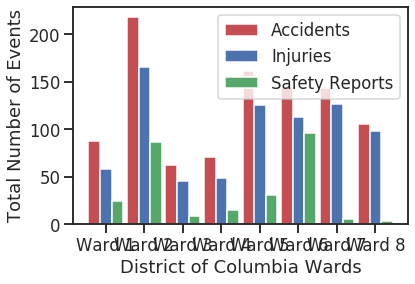

In [0]:
N = 8
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars

fig, ax = plt.subplots()

ax.bar(ind-width, ward_accidents.incidents, width, color='r', label = 'Accidents')
ax.bar(ind, ward_injuries.total_injuries, width, color='b', label = 'Injuries')
ax.bar(ind+width, safety_accid_by_ward_df.SAFETY_CONCERNS, width, color='g', label = 'Safety Reports')

ax.set_xticks(np.arange(8))
xlabels = ward_accidents.index
ax.set_xticklabels(xlabels)

plt.xlabel('District of Columbia Wards')
plt.ylabel('Total Number of Events') 
plt.legend()

plt.show()

#### **Accidents and Injuries**

The number of accidents and injuries differ significantly across wards. Also, the ward with the highest number of accidents does not have the highest number of injuries. 

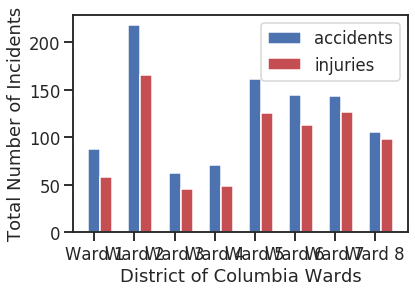

In [0]:
N2 = 8
ind2 = np.arange(N2)  # the x locations for the groups
width2 = 0.30       # the width of the bars

fig, ax = plt.subplots()

ax.bar(ind2, ward_accidents.incidents, width, color="b", label="accidents")
ax.bar(ind2+width2, ward_injuries.total_injuries, width, color="r", label="injuries")

ax.set_xticks(np.arange(8))
xlabels = ward_accidents.index
ax.set_xticklabels(xlabels)

plt.xlabel('District of Columbia Wards')
plt.ylabel('Total Number of Incidents') 
plt.legend()

plt.show()